## Importing necessary libraries

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pointbiserialr
import pingouin as pg
import os
from collections import defaultdict
import re
pd.set_option('display.max_rows', 300)
import math

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Loading the transposed merged dataframe

In [2]:
df=pd.read_csv("processed_1.csv")
df=df.drop(["Unnamed: 0"],axis=1)
dff=df
df

/tmp/ipykernel_21457/1133348913.py:1: DtypeWarning: Columns (16,17,18,38,40,41,53,54,55,56,57,58,59,60,65,66,71,72,73,75,76,81,82,83,84,85,86,87,88,89,90,91,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,118,136,138,139,151,152,153,154,155,156,158,163,164,169,170,171,174,179,180,181,182,183,184,185,186,187,188,189,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,216) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("processed_1.csv")


,PatientIDWoundNumber,FinalVisit_Healing_Status,AccidentType,acquiredAtFacility,ActiveWound,ClusteredWound,DateAcquired,Left_Right,Location,PendingAmputationOnPresentation,...,NecroticTypeBlackEschar_Visit19,TendernessOnPalpation_Visit19,Bogginess_Visit19,NecroticTypeWetHydrated_Visit19,DryEscharFluctance_Visit19,GranulationQualityHypertrophic_Visit19,NecroticTypeYellowSlough_Visit19,DayNumber_Visit19,Updated_Stage_Visit19,Wound_healing_status_Visit19
0,10000074_1,0,0,0,True,False,1.0,1,21,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000392_1,3,0,0,True,False,-18.0,1,34,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000392_2,3,0,0,True,False,-1.0,2,34,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000580_1,0,0,0,True,False,-244.0,1,34,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000741_1,2,0,0,True,False,-10.0,1,22,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,9993746_1,1,0,0,True,False,-14.0,0,3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18888,9993746_2,1,0,0,True,False,-6.0,0,78,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18889,9995327_1,3,0,0,True,False,1.0,0,21,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18890,9995360_1,0,0,0,True,False,1.0,0,21,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_dropped=df

In [4]:
df_dropped["FinalVisit_Healing_Status"].value_counts()

FinalVisit_Healing_Status
3    7704
1    5888
2    2839
0    2461
Name: count, dtype: int64

In [5]:
## We are removing the DayNumber columns because it is really not giving much relevance to predict the healing status

In [6]:
columns_to_remove = df_dropped.columns[df_dropped.columns.str.startswith('DayNumber')]

# Remove the columns starting with 'imageFileCount'
df_dropped = df_dropped.drop(columns=columns_to_remove)

df_dropped = df_dropped.drop(["PatientIDWoundNumber"],axis=1)

# Q1 = df_reduced['BMI'].quantile(0.25)
# Q3 = df_reduced['BMI'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the acceptable range for 'BMI' values
# lower_bound = Q1 - 3 * IQR
# upper_bound = Q3 + 3 * IQR

# # Filter rows within the acceptable range
# df_reduced= df_reduced[(df_reduced['BMI'] >= lower_bound) & (df_reduced['BMI'] <= upper_bound)]
df_dropped

,FinalVisit_Healing_Status,AccidentType,acquiredAtFacility,ActiveWound,ClusteredWound,DateAcquired,Left_Right,Location,PendingAmputationOnPresentation,ResolvedRecurrence,...,ErythemaLocCircumferential_Visit19,NecroticTypeBlackEschar_Visit19,TendernessOnPalpation_Visit19,Bogginess_Visit19,NecroticTypeWetHydrated_Visit19,DryEscharFluctance_Visit19,GranulationQualityHypertrophic_Visit19,NecroticTypeYellowSlough_Visit19,Updated_Stage_Visit19,Wound_healing_status_Visit19
0,0,0,0,True,False,1.0,1,21,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,0,True,False,-18.0,1,34,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,0,True,False,-1.0,2,34,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,True,False,-244.0,1,34,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,0,True,False,-10.0,1,22,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,1,0,0,True,False,-14.0,0,3,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18888,1,0,0,True,False,-6.0,0,78,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18889,3,0,0,True,False,1.0,0,21,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18890,0,0,0,True,False,1.0,0,21,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Iterate over each column in the dataframe
# for column in df_dropped.columns:
#     print(column)
#     # Check if the column is of object or categorical type
#     if df_dropped[column].dtype == 'object':
#         # Convert the column to string type
#         df_dropped[column] = df_dropped[column].astype(str)
        
#         # Fit and transform the categorical column
#         df_dropped[column] = label_encoder.fit_transform(df_dropped[column])

In [8]:
categorical_features=["CompDiet", "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", "CompMedication",
                      "CompOffLoad", "CompSmoking", "CompWoundVisits", "ExudateAmount", "GranulatedHyperGranulated",
                      "lowerExtremityEdema", "NonGranulationBiofilm", "NonGranulationDessicated", "woundProgress",
                      "Bogginess", "DryEscharFluctance", "AccidentType", "acquiredAtFacility", "Left_Right", 
                      "woundstatus", "AdmissionStatusCode", "CauseOfDeath", "ethnicityCdcCode", "patientEthnicity",
                      "PatientGender", "PatientZIP", "RaceCodeList", "Religion", "SecondaryRaceCodeList", 
                      "Patient_Title", "Patient_DocumentType", "Patient_RiskLevel", "SmokingStatus",
                      "Wound_healing_status", "Stage_Type", "Updated_Stage", "Location"]


# Iterate over columns
for col in df_dropped.columns:
    for prefix in categorical_features:
        if col.startswith(prefix) or col == prefix:
            df_dropped[col] = df_dropped[col].astype('category')

# Verify the changes
print(df_dropped.dtypes)

FinalVisit_Healing_Status                    int64
AccidentType                              category
acquiredAtFacility                        category
ActiveWound                                   bool
ClusteredWound                                bool
                                            ...   
DryEscharFluctance_Visit19                category
GranulationQualityHypertrophic_Visit19      object
NecroticTypeYellowSlough_Visit19            object
Updated_Stage_Visit19                     category
Wound_healing_status_Visit19              category
Length: 1833, dtype: object


In [9]:
boolean_features=["AdiposeExposed", 'AdiposeNecrosisExposed', 'AtrophieBlanche', 'BoneNecrosisExposed', 
                      'BrawnyInduration', 'Callus', 'CapsuleExposed', 'CapsuleNecrosisExposed', 'Crepitus', 
                      'Cyanosis', 'Denuded', 'DryScaly', 'Ecchymosis', 'Edema', 'Erythema', 'Excoriation', 
                      'ExposedBone', 'ExposedMuscle', 'ExposedTendon', 'Fluctuance', 'Friable', 
                      'GranulationQualityPale', 'GranulationQualityPink', 'GranulationQualityRed', 'greygran', 
                      'Hemosiderosis', 'hypergran', 'Induration', 'Maceration', 'Moist', 'MuscleNecrosisExposed', 
                      'NoMeasurableDepth', 'NormalColor', 'NormalMoisture', 'normalTexture', 'NurseOnlyVisit', 
                      'Pallor', 'pinkgran', 'Rash', 'redgran', 'Rubor', 'Scarring', 'Shiny', 'sinustract', 
                      'SloughLessThan20', 'SSAbscess', 'SSCAndSPending', 'SSChangesInGranulationTissue', 
                      'SSConfirmedLocal', 'SSConfirmedSystemic', 'SSDrainageDisproportionate', 'SSDrainageThick', 
                      'SSFever', 'SSFoulWoundOdor', 'SSIncreasedEdema', 'SSInflammationExtendingToBone', 
                      'SSMalaise', 'SSNewOnset', 'SSOther', 'SSPocketing', 'SSPoorlyDefinedErythemalBorder', 
                      'SSSignsAndSymptoms', 'SSSystemicAntibiotics', 'SSTopicalAntibiotics', 
                      'SSWarmthExtendingBeyondLocalPeriWound', 'SSWoundStalling', 'SSXRay', 'SystematicInfection', 
                      'TendonNecrosisExposed', 'TunnelingOrUndermining', 'ErythemaLocCircumferential', 
                      'NecroticTypeBlackEschar', 'JointNecrosisExposed', 'TendernessOnPalpation', 'ExposedJoint', 
                      'NecroticTypeWetHydrated', 'GranulationQualityHypertrophic', 'NecroticTypeYellowSlough', 
                      'ActiveWound', 'ClusteredWound', 'PendingAmputationOnPresentation', 'ResolvedRecurrence', 
                      'ResultOfAccident', 'WoundRecurrence', 'MedicareAdmission', 'NonWoundDiagnosis', 
                      'PalliativeCare', "PatientSelfCare"]


# Iterate over columns
for col in df_dropped.columns:
    for prefix in boolean_features:
        if col.startswith(prefix) or col == prefix:
            df_dropped[col] = df_dropped[col].astype('boolean')

# Verify the changes
df_dropped.dtypes

FinalVisit_Healing_Status                    int64
AccidentType                              category
acquiredAtFacility                        category
ActiveWound                                boolean
ClusteredWound                             boolean
                                            ...   
DryEscharFluctance_Visit19                category
GranulationQualityHypertrophic_Visit19     boolean
NecroticTypeYellowSlough_Visit19           boolean
Updated_Stage_Visit19                     category
Wound_healing_status_Visit19              category
Length: 1833, dtype: object

In [10]:
df_dropped

,FinalVisit_Healing_Status,AccidentType,acquiredAtFacility,ActiveWound,ClusteredWound,DateAcquired,Left_Right,Location,PendingAmputationOnPresentation,ResolvedRecurrence,...,ErythemaLocCircumferential_Visit19,NecroticTypeBlackEschar_Visit19,TendernessOnPalpation_Visit19,Bogginess_Visit19,NecroticTypeWetHydrated_Visit19,DryEscharFluctance_Visit19,GranulationQualityHypertrophic_Visit19,NecroticTypeYellowSlough_Visit19,Updated_Stage_Visit19,Wound_healing_status_Visit19
0,0,0,0,True,False,1.0,1,21,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
1,3,0,0,True,False,-18.0,1,34,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
2,3,0,0,True,False,-1.0,2,34,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
3,0,0,0,True,False,-244.0,1,34,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
4,2,0,0,True,False,-10.0,1,22,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,1,0,0,True,False,-14.0,0,3,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
18888,1,0,0,True,False,-6.0,0,78,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
18889,3,0,0,True,False,1.0,0,21,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
18890,0,0,0,True,False,1.0,0,21,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN


## Removing highly correlated features

In [11]:
# Example dataset (replace this with your actual dataset)
data = df_dropped

# Custom correlation function to handle NaN values
def custom_correlation(x, y, method):
    valid_values = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_values]
    y_valid = y[valid_values]
    
    if method == 'pearson':
        # Handle NaN values for Pearson correlation
        mask = np.isfinite(x_valid) & np.isfinite(y_valid)
        correlation_result = pointbiserialr(x_valid[mask], y_valid[mask])
    elif method == 'pointbiserial':
        correlation_result = pointbiserialr(x_valid, y_valid)
    else:
        raise ValueError(f"Unsupported correlation method: {method}")
    
    return correlation_result

# Create an empty dictionary to store correlation results
correlation_results = {}

# Iterate through numerical columns
for numerical_var in data.select_dtypes(include=['float64', 'int64']).columns:
    # Iterate through all columns
    for column in data.columns:
        # Skip the numerical variable itself
        if column == numerical_var:
            continue
        
        # Determine data types
        data_type_numerical = data[numerical_var].dtype
        data_type_column = data[column].dtype
        
        # Apply the appropriate correlation method based on data types
        if data_type_numerical in ['float64', 'int64'] and data_type_column in ['float64', 'int64']:
            # Both variables are numerical - use Pearson correlation
            correlation_result = custom_correlation(data[numerical_var], data[column], 'pearson')
        elif data_type_numerical in ['float64', 'int64'] and data_type_column == 'object':
            # Numerical variable and categorical variable - use point-biserial correlation
            # Convert binary categorical data to numeric
            data_numeric = pd.Categorical(data[column]).codes
            correlation_result = custom_correlation(data[numerical_var], data_numeric, 'pointbiserial')
        # Add other cases as needed
        else:
            # Other combinations - skip or handle accordingly
            continue
        
        # Store the correlation result
        key = f"{numerical_var}_vs_{column}"
        correlation_results[key] = correlation_result

# Print the results
for key, result in correlation_results.items():
    print(f"Correlation {key}:\n{result}\n")


Correlation FinalVisit_Healing_Status_vs_DateAcquired:
SignificanceResult(statistic=-0.03750012960500832, pvalue=1.303028589852309e-06)

Correlation FinalVisit_Healing_Status_vs_PatientDOB:
SignificanceResult(statistic=-0.005709625240580593, pvalue=0.43265943325467915)

Correlation FinalVisit_Healing_Status_vs_DateAdded_patient:
SignificanceResult(statistic=-0.01800120085585428, pvalue=0.01339259437932154)

Correlation FinalVisit_Healing_Status_vs_Patient_Score:
SignificanceResult(statistic=-0.04464062070245878, pvalue=6.01948649387649e-09)

Correlation FinalVisit_Healing_Status_vs_area_Visit1:
SignificanceResult(statistic=0.026108688730926696, pvalue=0.00033199234327849404)

Correlation FinalVisit_Healing_Status_vs_area_Visit2:
SignificanceResult(statistic=0.07364099655516873, pvalue=3.8671812002805395e-24)

Correlation FinalVisit_Healing_Status_vs_area_Visit3:
SignificanceResult(statistic=0.06437728191194714, pvalue=3.502603879531246e-15)

Correlation FinalVisit_Healing_Status_vs_are

## Removing features using feature importance

In [12]:
# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Iterate over each column in the dataframe
# for column in df_dropped.columns:
#     print(column)
#     # Check if the column is of object or categorical type
#     if df_dropped[column].dtype == 'category':
#         # Convert the column to string type
#         df_dropped[column] = df_dropped[column].astype('str')
        
#         # Fit and transform the categorical column
#         df_dropped[column] = label_encoder.fit_transform(df_dropped[column])

In [13]:
df=df_dropped

target_column='FinalVisit_Healing_Status'

X = df.drop([target_column], axis=1)
y = df[target_column]

X_train_resampled, y_train_resampled = X, y

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X)
#X_test_scaled = scaler.transform(X_test)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', random_state=42, enable_categorical=True, max_cat_to_onehot=1)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model on resampled and scaled data using RandomizedSearchCV
random_search.fit(X_train_resampled_scaled, y_train_resampled)

xgb_classifier_important=random_search.best_estimator_

# Fit the model on resampled and scaled data
xgb_classifier_important.fit(X_train_resampled_scaled, y_train_resampled)

rf=xgb_classifier_important

for key, result in correlation_results.items():
    #print(key)
    # Split the string into two parts
    split_parts = key.split('_vs_')
    # Display the result
    
    
    if abs(round(result[0],4))>0.5:
        
        print(split_parts)
        print("Correlation Coeff:",round(result[0],4))
        feature1=split_parts[0]
        feature2=split_parts[1]

        columns_to_check = [feature1, feature2]

        # Iterate through the columns and check if each column is present
        if set(columns_to_check).issubset(df.columns):
            print("Both columns are present in the DataFrame.")

            # Print feature importance
            print(f"\nFeature Importance for {feature1}: {pd.Series(rf.feature_importances_, index=X.columns)[feature1]}")
            print(f"Feature Importance for {feature2}: {pd.Series(rf.feature_importances_, index=X.columns)[feature2]}")

            feature_1_importance=pd.Series(rf.feature_importances_, index=X.columns)[feature1]
            feature_2_importance=pd.Series(rf.feature_importances_, index=X.columns)[feature2]

            # Drop the less important feature
            if feature_1_importance < feature_2_importance:
                df.drop(feature1, axis=1, inplace=True)
                print("Dropping",feature1,"\n")
            else:
                df.drop(feature2, axis=1, inplace=True)
                print("Dropping",feature2,"\n")

    # Display the modified DataFrame
display(df)

['area_Visit1', 'area_Visit2']
Correlation Coeff: 0.8318
Both columns are present in the DataFrame.

Feature Importance for area_Visit1: 0.00017347981338389218
Feature Importance for area_Visit2: 0.002420971170067787
Dropping area_Visit1 

['area_Visit1', 'area_Visit3']
Correlation Coeff: 0.728
['area_Visit1', 'area_Visit4']
Correlation Coeff: 0.6674
['area_Visit1', 'area_Visit5']
Correlation Coeff: 0.6349
['area_Visit1', 'area_Visit6']
Correlation Coeff: 0.6005
['area_Visit1', 'area_Visit7']
Correlation Coeff: 0.5669
['area_Visit1', 'area_Visit8']
Correlation Coeff: 0.5443
['area_Visit1', 'area_Visit9']
Correlation Coeff: 0.5076
['area_Visit2', 'area_Visit1']
Correlation Coeff: 0.8318
['area_Visit2', 'area_Visit3']
Correlation Coeff: 0.8294
Both columns are present in the DataFrame.

Feature Importance for area_Visit2: 0.002420971170067787
Feature Importance for area_Visit3: 0.0026852095033973455
Dropping area_Visit2 

['area_Visit2', 'area_Visit4']
Correlation Coeff: 0.7589
['area_Vi

,FinalVisit_Healing_Status,AccidentType,acquiredAtFacility,ActiveWound,ClusteredWound,DateAcquired,Left_Right,Location,PendingAmputationOnPresentation,ResolvedRecurrence,...,ErythemaLocCircumferential_Visit19,NecroticTypeBlackEschar_Visit19,TendernessOnPalpation_Visit19,Bogginess_Visit19,NecroticTypeWetHydrated_Visit19,DryEscharFluctance_Visit19,GranulationQualityHypertrophic_Visit19,NecroticTypeYellowSlough_Visit19,Updated_Stage_Visit19,Wound_healing_status_Visit19
0,0,0,0,True,False,1.0,1,21,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
1,3,0,0,True,False,-18.0,1,34,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
2,3,0,0,True,False,-1.0,2,34,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
3,0,0,0,True,False,-244.0,1,34,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
4,2,0,0,True,False,-10.0,1,22,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,1,0,0,True,False,-14.0,0,3,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
18888,1,0,0,True,False,-6.0,0,78,False,<NA>,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
18889,3,0,0,True,False,1.0,0,21,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN
18890,0,0,0,True,False,1.0,0,21,False,False,...,<NA>,<NA>,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN,NaN


In [14]:
df_reduced=df

In [15]:
df_reduced.to_csv("df_reduced.csv")

In [12]:
df_reduced=pd.read_csv("df_reduced.csv")
df_reduced=df_reduced.drop(["Unnamed: 0"], axis=1)

/tmp/ipykernel_21457/2650956880.py:1: DtypeWarning: Columns (15,16,17,36,38,39,51,52,53,54,55,56,57,58,63,64,69,70,71,73,74,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,116,132,134,135,147,148,149,150,151,152,154,159,160,165,166,167,170,175,176,177,178,179,180,181,182,183,184,185,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,212) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reduced=pd.read_csv("df_reduced.csv")


In [13]:
df_reduced

,FinalVisit_Healing_Status,AccidentType,acquiredAtFacility,ActiveWound,ClusteredWound,DateAcquired,Left_Right,Location,PendingAmputationOnPresentation,ResolvedRecurrence,...,ErythemaLocCircumferential_Visit19,NecroticTypeBlackEschar_Visit19,TendernessOnPalpation_Visit19,Bogginess_Visit19,NecroticTypeWetHydrated_Visit19,DryEscharFluctance_Visit19,GranulationQualityHypertrophic_Visit19,NecroticTypeYellowSlough_Visit19,Updated_Stage_Visit19,Wound_healing_status_Visit19
0,0,0,0,True,False,1.0,1,21,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,0,True,False,-18.0,1,34,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,0,True,False,-1.0,2,34,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,True,False,-244.0,1,34,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,0,True,False,-10.0,1,22,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,1,0,0,True,False,-14.0,0,3,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18888,1,0,0,True,False,-6.0,0,78,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18889,3,0,0,True,False,1.0,0,21,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18890,0,0,0,True,False,1.0,0,21,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Set CUDA_VISIBLE_DEVICES
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
print(os.environ["CUDA_VISIBLE_DEVICES"])


0,1


In [15]:
prefixes_to_convert = ["CompDiet", "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", "CompMedication",
                      "CompOffLoad", "CompSmoking", "CompWoundVisits", "ExudateAmount", "GranulatedHyperGranulated",
                      "lowerExtremityEdema", "NonGranulationBiofilm", "NonGranulationDessicated", "woundProgress",
                      "Bogginess", "DryEscharFluctance", "AccidentType", "acquiredAtFacility", "Left_Right", 
                      "woundstatus", "AdmissionStatusCode", "CauseOfDeath", "ethnicityCdcCode", "patientEthnicity",
                      "PatientGender", "PatientZIP", "RaceCodeList", "Religion", "SecondaryRaceCodeList", 
                      "Patient_Title", "Patient_DocumentType", "Patient_RiskLevel", "SmokingStatus",
                      "Wound_healing_status", "Stage_Type", "Updated_Stage", "Location"]

# Iterate over columns
for col in df_reduced.columns:
    for prefix in prefixes_to_convert:
        if col.startswith(prefix) or col == prefix:
            df_reduced[col] = df_reduced[col].astype('category')

# Verify the changes
print(df_reduced.dtypes)

FinalVisit_Healing_Status                    int64
AccidentType                              category
acquiredAtFacility                        category
ActiveWound                                   bool
ClusteredWound                                bool
                                            ...   
DryEscharFluctance_Visit19                category
GranulationQualityHypertrophic_Visit19      object
NecroticTypeYellowSlough_Visit19            object
Updated_Stage_Visit19                     category
Wound_healing_status_Visit19              category
Length: 1816, dtype: object


In [16]:
prefixes_to_convert = ["AdiposeExposed", 'AdiposeNecrosisExposed', 'AtrophieBlanche', 'BoneNecrosisExposed', 
                      'BrawnyInduration', 'Callus', 'CapsuleExposed', 'CapsuleNecrosisExposed', 'Crepitus', 
                      'Cyanosis', 'Denuded', 'DryScaly', 'Ecchymosis', 'Edema', 'Erythema', 'Excoriation', 
                      'ExposedBone', 'ExposedMuscle', 'ExposedTendon', 'Fluctuance', 'Friable', 
                      'GranulationQualityPale', 'GranulationQualityPink', 'GranulationQualityRed', 'greygran', 
                      'Hemosiderosis', 'hypergran', 'Induration', 'Maceration', 'Moist', 'MuscleNecrosisExposed', 
                      'NoMeasurableDepth', 'NormalColor', 'NormalMoisture', 'normalTexture', 'NurseOnlyVisit', 
                      'Pallor', 'pinkgran', 'Rash', 'redgran', 'Rubor', 'Scarring', 'Shiny', 'sinustract', 
                      'SloughLessThan20', 'SSAbscess', 'SSCAndSPending', 'SSChangesInGranulationTissue', 
                      'SSConfirmedLocal', 'SSConfirmedSystemic', 'SSDrainageDisproportionate', 'SSDrainageThick', 
                      'SSFever', 'SSFoulWoundOdor', 'SSIncreasedEdema', 'SSInflammationExtendingToBone', 
                      'SSMalaise', 'SSNewOnset', 'SSOther', 'SSPocketing', 'SSPoorlyDefinedErythemalBorder', 
                      'SSSignsAndSymptoms', 'SSSystemicAntibiotics', 'SSTopicalAntibiotics', 
                      'SSWarmthExtendingBeyondLocalPeriWound', 'SSWoundStalling', 'SSXRay', 'SystematicInfection', 
                      'TendonNecrosisExposed', 'TunnelingOrUndermining', 'ErythemaLocCircumferential', 
                      'NecroticTypeBlackEschar', 'JointNecrosisExposed', 'TendernessOnPalpation', 'ExposedJoint', 
                      'NecroticTypeWetHydrated', 'GranulationQualityHypertrophic', 'NecroticTypeYellowSlough', 
                      'ActiveWound', 'ClusteredWound', 'PendingAmputationOnPresentation', 'ResolvedRecurrence', 
                      'ResultOfAccident', 'WoundRecurrence', 'MedicareAdmission', 'NonWoundDiagnosis', 
                      'PalliativeCare', "PatientSelfCare"]

# Iterate over columns
for col in df_reduced.columns:
    for prefix in prefixes_to_convert:
        if col.startswith(prefix) or col == prefix:
            df_reduced[col] = df_reduced[col].astype('boolean')

# Verify the changes
print(df_reduced.dtypes)

FinalVisit_Healing_Status                    int64
AccidentType                              category
acquiredAtFacility                        category
ActiveWound                                boolean
ClusteredWound                             boolean
                                            ...   
DryEscharFluctance_Visit19                category
GranulationQualityHypertrophic_Visit19     boolean
NecroticTypeYellowSlough_Visit19           boolean
Updated_Stage_Visit19                     category
Wound_healing_status_Visit19              category
Length: 1816, dtype: object


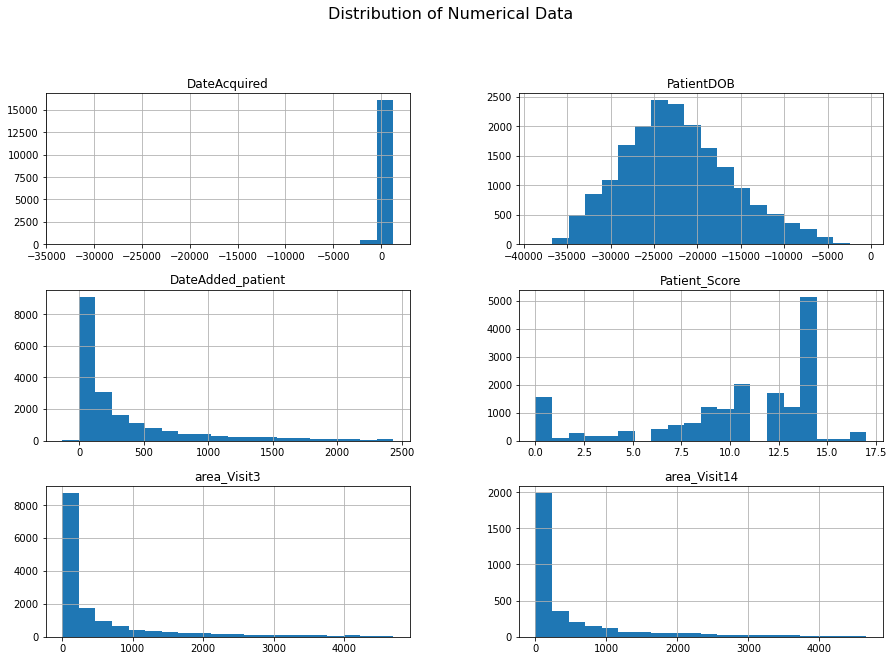

In [17]:
target_column = 'FinalVisit_Healing_Status'

# Split the data into features (X) and the target variable (y)
X = df_reduced.drop([target_column], axis=1)

# Assuming X is your DataFrame with numerical columns
numerical_columns = X.select_dtypes(exclude=['category', 'boolean']).columns

# Plot histograms for each numerical column
X[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Data', y=1, fontsize=16)
plt.show()

## Removing the outliers in DateAcquired column

In [18]:
# Function to remove outliers using IQR method for multiple columns
def remove_outliers_iqr_multi(df, columns):
    df_filtered = df.copy()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Remove rows with values outside the bounds for the current column
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

In [19]:
# Specify the columns for outlier removal
columns_to_remove_outliers = ['DateAcquired']

# Apply the function to remove outliers from specified columns
df_no_outliers = remove_outliers_iqr_multi(df_reduced, columns_to_remove_outliers)

#df_no_outliers["Length"]=abs(df_no_outliers["Length"])
#df_no_outliers["Depth"]=abs(df_no_outliers["Depth"])

In [20]:
df_reduced = df_no_outliers

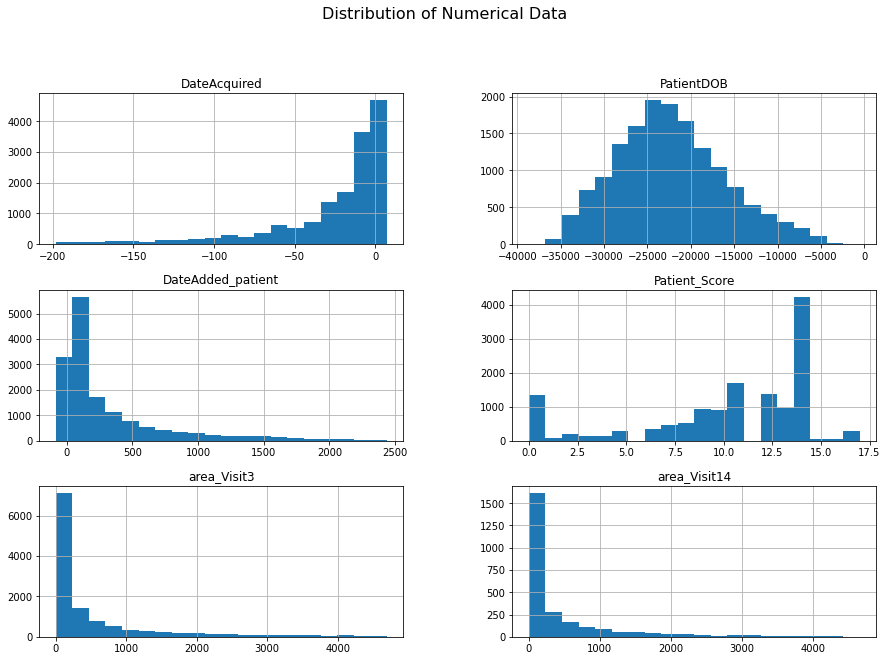

In [21]:
target_column = 'FinalVisit_Healing_Status'

# Split the data into features (X) and the target variable (y)
X = df_reduced.drop([target_column], axis=1)

# Assuming X is your DataFrame with numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
X[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Data', y=1, fontsize=16)
plt.show()

## Classification model with wound_healing_status throughout the visits

In [30]:
target_column = 'FinalVisit_Healing_Status'

# Split the data into features (X) and the target variable (y)
X = df_reduced.drop([target_column], axis=1)
y = df_reduced[target_column]

print("Unique values in the target variable:", y.unique())
print("Data type of the target variable:", y.dtype)
# Convert target variable to integer type
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled = X_train, y_train

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model on resampled and scaled data using RandomizedSearchCV
random_search.fit(X_train_resampled_scaled, y_train_resampled)

xgb_classifier=random_search.best_estimator_

# Fit the model on resampled and scaled data
xgb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a mask for columns with importance greater than or equal to 0.001
important_columns_mask = feature_importances > 0

# Get the names of the important columns
important_columns = X.columns[important_columns_mask]

# Filter X to keep only the important columns
X_filtered = X[important_columns]
display(X_filtered)

target_column = 'FinalVisit_Healing_Status'

# Split the data into features (X) and the target variable (y)
X = X_filtered
y = df_reduced[target_column]

print("Unique values in the target variable:", y.unique())
print("Data type of the target variable:", y.dtype)
# Convert target variable to integer type
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled = X_train, y_train

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model on resampled and scaled data using RandomizedSearchCV
random_search.fit(X_train_resampled_scaled, y_train_resampled)

xgb_classifier_important=random_search.best_estimator_

# Fit the model on resampled and scaled data
xgb_classifier_important.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the target variable for the test set
y_pred_important = xgb_classifier_important.predict(X_test_scaled)

# Generate the classification report
report_important = classification_report(y_test, y_pred_important)
print(report_important)

# Accuracy on the test set
accuracy_important = accuracy_score(y_test, y_pred_important)
print("Test Set Accuracy (Important Features):", accuracy_important)


feature_importances = xgb_classifier_important.feature_importances_


# Get feature names
feature_names = X_filtered.columns

# Get indices that would sort feature importances in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Print the sorted feature names and importances
print("Sorted Feature Importances:")
for i, index in enumerate(sorted_feature_indices):
    feature_name = feature_names[index]
    importance_value = feature_importances[index]
    print(f"{i + 1}. Feature {feature_name}: Importance = {importance_value}")
    
# are we losing the categorical variables during feature importance?. In gradient model, we might eliminate imp. features which are categorical variables.
# ensure the preprocessing is done correctly, check the scaling, check the feature matrix. (done)
#try CV on XGBoost training (change the parameters in the model) (done)
#using for loop, check the distribution of the numerical variables one by one and use scaler accordingly
#the scaling of the numerical variables should be different, not standard scaling

Unique values in the target variable: [0 3 2 1]
Data type of the target variable: int64


,AccidentType,DateAcquired,Left_Right,Location,ResolvedRecurrence,ResultOfAccident,AdmissionStatusCode,MedicareAdmission,NonWoundDiagnosis,PalliativeCare,...,Shiny_Visit19,SSCAndSPending_Visit19,SSMalaise_Visit19,SSSignsAndSymptoms_Visit19,SSSystemicAntibiotics_Visit19,SSTopicalAntibiotics_Visit19,TunnelingOrUndermining_Visit19,woundProgress_Visit19,Updated_Stage_Visit19,Wound_healing_status_Visit19
0,0,1.0,1,21,False,False,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
1,0,-18.0,1,34,<NA>,False,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
2,0,-1.0,2,34,<NA>,<NA>,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
4,0,-10.0,1,22,False,False,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
5,0,1.0,1,21,False,False,0,<NA>,False,False,...,False,False,False,False,False,False,<NA>,2.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,0,-14.0,0,3,<NA>,<NA>,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
18888,0,-6.0,0,78,<NA>,<NA>,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
18889,0,1.0,0,21,False,False,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
18890,0,1.0,0,21,False,False,0,<NA>,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN


Unique values in the target variable: [0 3 2 1]
Data type of the target variable: int64
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       422
           1       0.93      0.93      0.93       964
           2       1.00      0.88      0.94       492
           3       0.89      0.98      0.93      1186

    accuracy                           0.93      3064
   macro avg       0.95      0.92      0.93      3064
weighted avg       0.94      0.93      0.93      3064

Test Set Accuracy (Important Features): 0.9327676240208878
Sorted Feature Importances:
1. Feature GranulatedHyperGranulated_Visit3: Importance = 0.02672673389315605
2. Feature lowerExtremityEdema_Visit3: Importance = 0.026446131989359856
3. Feature Rubor_Visit3: Importance = 0.024101736024022102
4. Feature TunnelingOrUndermining_Visit4: Importance = 0.023327969014644623
5. Feature Friable_Visit3: Importance = 0.016305580735206604
6. Feature Pallor_Visit4: Importance = 0.01

In [31]:
feature_importances = xgb_classifier_important.feature_importances_

# Get feature names
feature_names = X_filtered.columns

# Get indices that would sort feature importances in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Create a list of tuples with feature names and importances
sorted_feature_list = [(feature_names[index], feature_importances[index]) for index in sorted_feature_indices]

# # Print the sorted feature names and importances
# print("Sorted Feature Importances:")
# for i, (feature_name, importance_value) in enumerate(sorted_feature_list):
#     print(f"{i + 1}. Feature {feature_name}: Importance = {importance_value}")

In [32]:
data = sorted_feature_list

# Create a dictionary to store summed values for each feature
summed_values = {}

# Iterate over the data
for feature, value in data:
    # Extract feature name without visit number
    feature_name = feature.split('_')[0]
    
    # Check if the feature_name is already in the dictionary
    if feature_name in summed_values:
        # Add the value to the existing sum
        summed_values[feature_name] += value
    else:
        # Initialize the sum for the new feature
        summed_values[feature_name] = value

# Sort the features based on summed values in descending order
sorted_features = sorted(summed_values.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and summed values with rounding up to 4 decimal points
for feature, sum_value in sorted_features:
    rounded_sum_value = math.ceil(sum_value * 10000) / 10000  # Round up to 4 decimal points
    print(f'{feature}: {rounded_sum_value}')

# Find the sum of all values
total_sum = math.ceil(sum(summed_values.values()) * 10000) / 10000  # Round up the total sum to 4 decimal points

# Print the total sum
print(f'Total Sum: {round(total_sum,2)}')


TunnelingOrUndermining: 0.0594
Rubor: 0.0505
Friable: 0.0485
SSXRay: 0.0457
BrawnyInduration: 0.0412
Cyanosis: 0.0375
Fluctuance: 0.0352
greygran: 0.0342
SSConfirmedLocal: 0.0321
SSTopicalAntibiotics: 0.0278
lowerExtremityEdema: 0.0276
GranulatedHyperGranulated: 0.0268
Ecchymosis: 0.0256
Excoriation: 0.0255
Pallor: 0.0252
SSConfirmedSystemic: 0.0251
SSCAndSPending: 0.0241
Shiny: 0.0225
pinkgran: 0.022
Denuded: 0.0216
Rash: 0.0213
Wound: 0.0201
AtrophieBlanche: 0.0193
DryScaly: 0.0173
Callus: 0.0167
SSSignsAndSymptoms: 0.0147
SSSystemicAntibiotics: 0.0139
CompDiet: 0.0138
Induration: 0.0127
Hemosiderosis: 0.0127
Updated: 0.0123
redgran: 0.0122
Crepitus: 0.011
NoMeasurableDepth: 0.0108
Erythema: 0.0103
woundProgress: 0.0095
Moist: 0.0091
Edema: 0.009
Maceration: 0.0086
ExposedMuscle: 0.008
sinustract: 0.0072
ExudateAmount: 0.0069
AdiposeNecrosisExposed: 0.0064
Scarring: 0.0063
ExposedTendon: 0.0059
NormalColor: 0.0055
AdiposeExposed: 0.005
BoneNecrosisExposed: 0.0046
TendonNecrosisExpose

## Classification model without wound_healing_status throughout the visits

In [27]:
target_column = 'FinalVisit_Healing_Status'

# Split the data into features (X) and the target variable (y)
X = df_reduced.drop([target_column, 'Wound_healing_status_Visit1', 'Wound_healing_status_Visit2', 'Wound_healing_status_Visit3', 'Wound_healing_status_Visit4', 
                     'Wound_healing_status_Visit5', 'Wound_healing_status_Visit6', 'Wound_healing_status_Visit7',
                     'Wound_healing_status_Visit8', 'Wound_healing_status_Visit9', 'Wound_healing_status_Visit10',
                     'Wound_healing_status_Visit11', 'Wound_healing_status_Visit12', 'Wound_healing_status_Visit13', 
                     'Wound_healing_status_Visit14', 'Wound_healing_status_Visit15', 'Wound_healing_status_Visit16', 
                     'Wound_healing_status_Visit17', 'Wound_healing_status_Visit18', 'Wound_healing_status_Visit19'], axis=1)
y = df_reduced[target_column]

print("Unique values in the target variable:", y.unique())
print("Data type of the target variable:", y.dtype)
# Convert target variable to integer type
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled = X_train, y_train

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model on resampled and scaled data using RandomizedSearchCV
random_search.fit(X_train_resampled_scaled, y_train_resampled)

xgb_classifier=random_search.best_estimator_

# Fit the model on resampled and scaled data
xgb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a mask for columns with importance greater than or equal to 0.0
important_columns_mask = feature_importances > 0

# Get the names of the important columns
important_columns = X.columns[important_columns_mask]

# Filter X to keep only the important columns
X_filtered = X[important_columns]
display(X_filtered)

target_column = 'FinalVisit_Healing_Status'

# Split the data into features (X) and the target variable (y)
X = X_filtered
y = df_reduced[target_column]

print("Unique values in the target variable:", y.unique())
print("Data type of the target variable:", y.dtype)
# Convert target variable to integer type
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled = X_train, y_train

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model on resampled and scaled data using RandomizedSearchCV
random_search.fit(X_train_resampled_scaled, y_train_resampled)

xgb_classifier_important=random_search.best_estimator_

# Fit the model on resampled and scaled data
xgb_classifier_important.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the target variable for the test set
y_pred_important = xgb_classifier_important.predict(X_test_scaled)

# Generate the classification report
report_important = classification_report(y_test, y_pred_important)
print(report_important)

# Accuracy on the test set
accuracy_important = accuracy_score(y_test, y_pred_important)
print("Test Set Accuracy (Important Features):", accuracy_important)


feature_importances = xgb_classifier_important.feature_importances_


# Get feature names
feature_names = X_filtered.columns

# Get indices that would sort feature importances in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Print the sorted feature names and importances
print("Sorted Feature Importances:")
for i, index in enumerate(sorted_feature_indices):
    feature_name = feature_names[index]
    importance_value = feature_importances[index]
    print(f"{i + 1}. Feature {feature_name}: Importance = {importance_value}")
    
# are we losing the categorical variables during feature importance?. In gradient model, we might eliminate imp. features which are categorical variables.
# ensure the preprocessing is done correctly, check the scaling, check the feature matrix. (done)
#try CV on XGBoost training (change the parameters in the model) (done)
#using for loop, check the distribution of the numerical variables one by one and use scaler accordingly
#the scaling of the numerical variables should be different, not standard scaling

Unique values in the target variable: [0 3 2 1]
Data type of the target variable: int64


,AccidentType,DateAcquired,Left_Right,Location,ResolvedRecurrence,ResultOfAccident,woundstatus,AdmissionStatusCode,MedicareAdmission,NonWoundDiagnosis,...,redgran_Visit19,Scarring_Visit19,Shiny_Visit19,SSCAndSPending_Visit19,SSSignsAndSymptoms_Visit19,SSSystemicAntibiotics_Visit19,TunnelingOrUndermining_Visit19,woundProgress_Visit19,DryEscharFluctance_Visit19,Updated_Stage_Visit19
0,0,1.0,1,21,False,False,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
1,0,-18.0,1,34,<NA>,False,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
2,0,-1.0,2,34,<NA>,<NA>,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
4,0,-10.0,1,22,False,False,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
5,0,1.0,1,21,False,False,4,0,<NA>,False,...,True,False,False,False,False,False,<NA>,2.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18887,0,-14.0,0,3,<NA>,<NA>,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
18888,0,-6.0,0,78,<NA>,<NA>,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
18889,0,1.0,0,21,False,False,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
18890,0,1.0,0,21,False,False,4,0,<NA>,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN


Unique values in the target variable: [0 3 2 1]
Data type of the target variable: int64
              precision    recall  f1-score   support

           0       0.30      0.08      0.12       422
           1       0.71      0.78      0.74       964
           2       0.48      0.30      0.37       492
           3       0.55      0.73      0.63      1186

    accuracy                           0.59      3064
   macro avg       0.51      0.47      0.46      3064
weighted avg       0.55      0.59      0.55      3064

Test Set Accuracy (Important Features): 0.5871409921671018
Sorted Feature Importances:
1. Feature TunnelingOrUndermining_Visit4: Importance = 0.030347459018230438
2. Feature Friable_Visit5: Importance = 0.01494036428630352
3. Feature TunnelingOrUndermining_Visit6: Importance = 0.011117870919406414
4. Feature Crepitus_Visit4: Importance = 0.010131686925888062
5. Feature TunnelingOrUndermining_Visit15: Importance = 0.009308704175055027
6. Feature Rubor_Visit15: Importance = 

In [28]:
feature_importances = xgb_classifier_important.feature_importances_

# Get feature names
feature_names = X_filtered.columns

# Get indices that would sort feature importances in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Create a list of tuples with feature names and importances
sorted_feature_list = [(feature_names[index], feature_importances[index]) for index in sorted_feature_indices]

# # Print the sorted feature names and importances
# print("Sorted Feature Importances:")
# for i, (feature_name, importance_value) in enumerate(sorted_feature_list):
#     print(f"{i + 1}. Feature {feature_name}: Importance = {importance_value}")


In [29]:
data = sorted_feature_list

# Create a dictionary to store summed values for each feature
summed_values = {}

# Iterate over the data
for feature, value in data:
    # Extract feature name without visit number
    feature_name = feature.split('_')[0]
    
    # Check if the feature_name is already in the dictionary
    if feature_name in summed_values:
        # Add the value to the existing sum
        summed_values[feature_name] += value
    else:
        # Initialize the sum for the new feature
        summed_values[feature_name] = value

# Sort the features based on summed values in descending order
sorted_features = sorted(summed_values.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and summed values with rounding up to 4 decimal points
for feature, sum_value in sorted_features:
    rounded_sum_value = math.ceil(sum_value * 10000) / 10000  # Round up to 4 decimal points
    print(f'{feature}: {rounded_sum_value}')

# Find the sum of all values
total_sum = math.ceil(sum(summed_values.values()) * 10000) / 10000  # Round up the total sum to 4 decimal points

# Print the total sum
print(f'Total Sum: {round(total_sum,2)}')


TunnelingOrUndermining: 0.0709
Friable: 0.0366
NoMeasurableDepth: 0.0348
Denuded: 0.0313
DryScaly: 0.0271
Rubor: 0.0269
Induration: 0.0258
greygran: 0.0248
Erythema: 0.0237
woundProgress: 0.0223
Hemosiderosis: 0.0221
redgran: 0.0213
Shiny: 0.0212
Callus: 0.0209
Rash: 0.0208
ExudateAmount: 0.0205
Fluctuance: 0.0204
sinustract: 0.0201
SSTopicalAntibiotics: 0.0197
Edema: 0.0196
Updated: 0.0195
Excoriation: 0.0186
SSConfirmedLocal: 0.018
SSSystemicAntibiotics: 0.0178
NormalColor: 0.0177
ExposedTendon: 0.0176
Moist: 0.0175
Scarring: 0.0175
Ecchymosis: 0.0175
Maceration: 0.017
pinkgran: 0.017
ExposedMuscle: 0.0165
normalTexture: 0.016
NormalMoisture: 0.0156
Cyanosis: 0.0155
AdiposeNecrosisExposed: 0.0152
AdiposeExposed: 0.015
Crepitus: 0.0139
SloughLessThan20: 0.0137
SSSignsAndSymptoms: 0.0135
TendonNecrosisExposed: 0.0125
CompDiet: 0.0124
BoneNecrosisExposed: 0.0112
SSXRay: 0.0104
SSCAndSPending: 0.0103
AtrophieBlanche: 0.0097
BrawnyInduration: 0.0092
CapsuleExposed: 0.0085
SSConfirmedSyste

In [11]:
# 3 = not healing
# 0 = grey
# 2 = healing
# 1 = healed